## Diffusion pseudotime on thymocytes after integration

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import anndata2ri
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 5]

sc.settings.set_figure_params(dpi=100, color_map='Blues')

In [2]:
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython

### Import integrated dataset 

In [3]:
%%R -o adata_r
adata_r <- readRDS("/home/jovyan/my_data/Tcells_CCA_integration_20191203.RDS")

In [4]:
%%R -o int_features
int_features <- readRDS("/home/jovyan/my_data/intFeatures_Tcells_CCA_integration_20191203.RDS")

In [95]:
# sc.pp.highly_variable_genes(adata_r)
# sc.pl.highly_variable_genes(adata_r)

# adata_hvg = adata_r[:, adata_r.var['highly_variable']]

In [5]:
adata_hvg = adata_r[:,[x for x in adata_r.var.index if x in int_features]]

In [6]:
sc.pp.neighbors(adata_hvg, n_pcs=30)

/home/jovyan/.local/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../.local/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/home/jovyan/.local/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../.local/lib/python3.7/site-packages/umap/utils.py", line 409:
@numba.njit(parall

In [7]:
sc.tl.leiden(adata_hvg)

... storing 'annotation' as categorical
... storing 'tech' as categorical


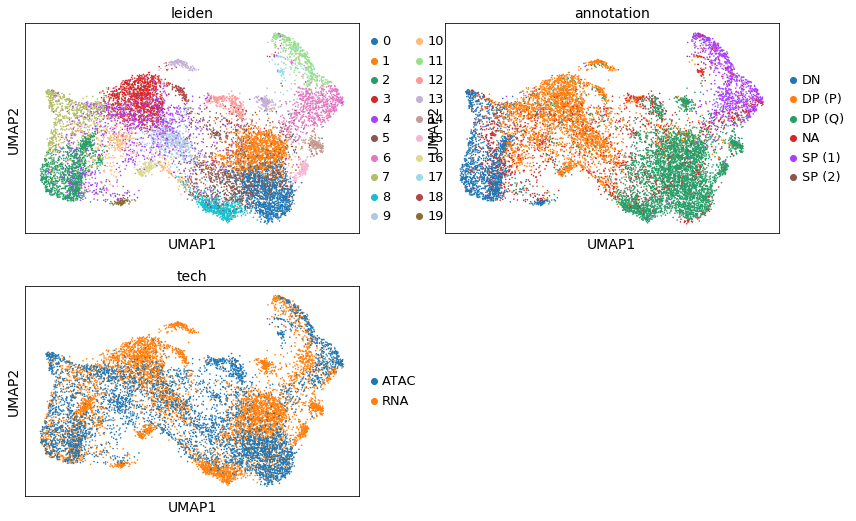

In [8]:
sc.pl.umap(adata_hvg, color=["leiden", "annotation", "tech"], ncols=2)

In [9]:
sc.tl.paga(adata_hvg, groups="leiden")

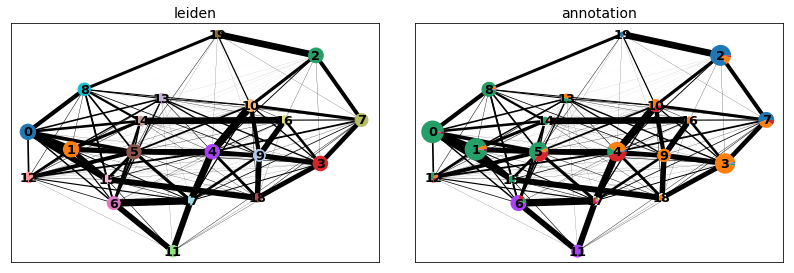

In [10]:
sc.pl.paga(adata_hvg, threshold=0., color=["leiden", "annotation"])

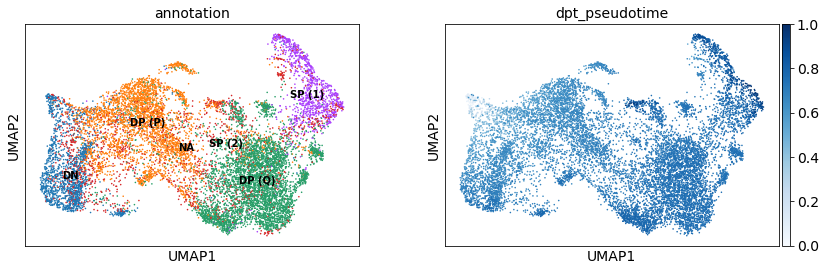

In [12]:
adata_hvg.uns["iroot"] = np.flatnonzero(adata_hvg.obs["iroot_cell"]==1)[0]
sc.tl.dpt(adata_hvg)
sc.pl.umap(adata_hvg, color=['annotation', 'dpt_pseudotime'], legend_loc='on data')

array([4806])

KeyError: 'iroot'

In [14]:
adata_hvg.obs.to_csv("/home/jovyan/my_data/Tcells_CCA_integration_20191203_scanpy_dpt.csv")

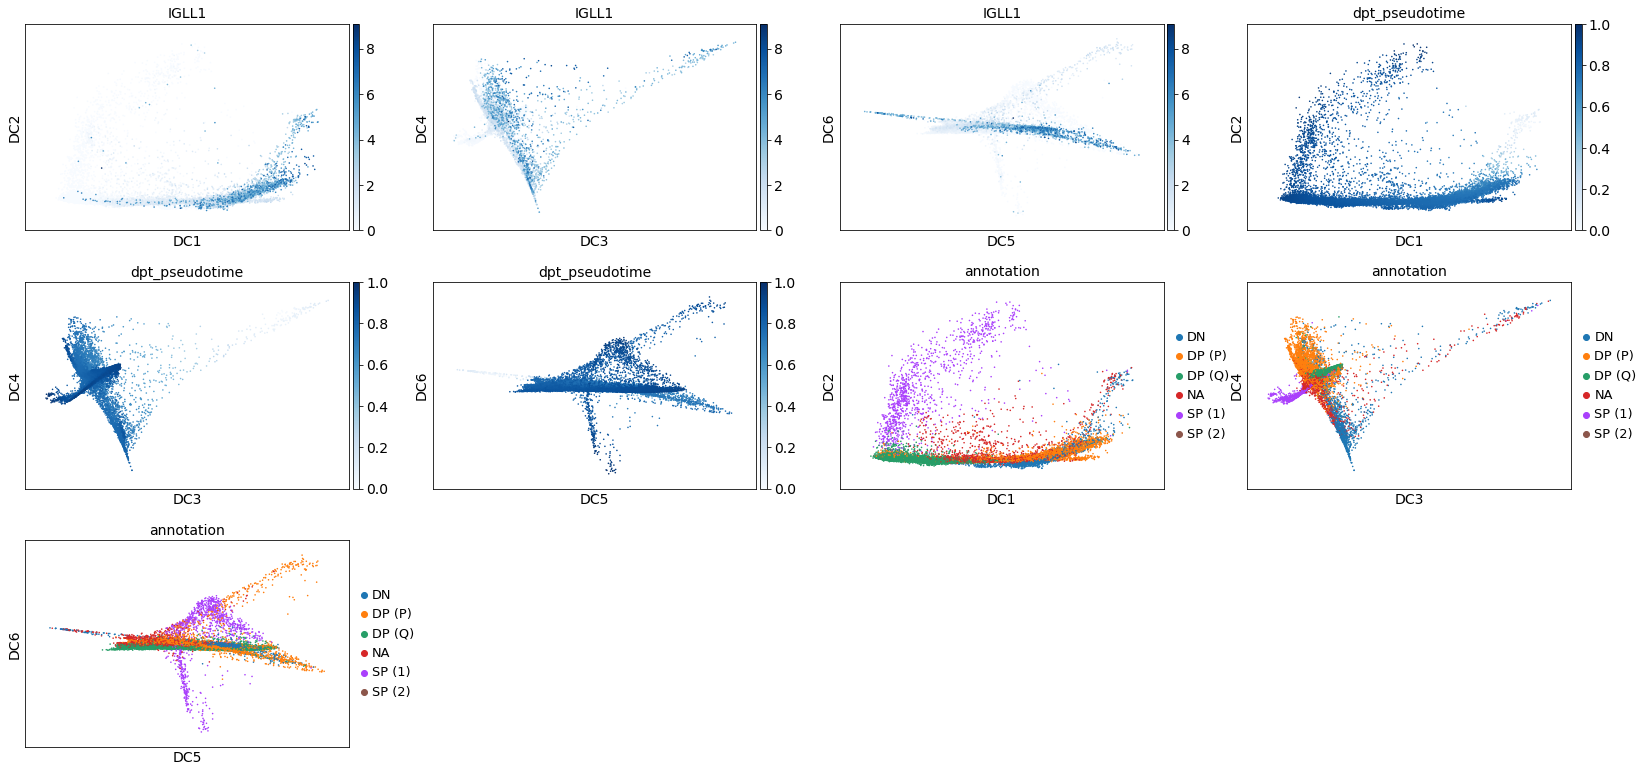

In [113]:
sc.pl.diffmap(adata_hvg, color=["IGLL1", "dpt_pseudotime", 'annotation'], layer="logcounts", components=['1,2', '3,4', '5,6'])

In [45]:
adata_r.obs

,tech,annotation
AAACCTGAGTTCGATC_1,RNA,2
AAACCTGCAAGTTGTC_1,RNA,13
AAACCTGCAATACGCT_1,RNA,4
AAACCTGCAATAGCGG_1,RNA,2
AAACCTGCATCACGAT_1,RNA,3
...,...,...
TTTGTGTGTGTCTCGG-1,ATAC,-2147483648
TTTGTGTGTTCCAATG-1,ATAC,-2147483648
TTTGTGTTCCATAACG-1,ATAC,-2147483648
TTTGTGTTCGATCGCG-1,ATAC,-2147483648
